# Импортируем библиотеки

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlalchemy as sqla

In [2]:
# Подключаемся к базе данных SQLite с помощью библиотеки sqlite 3
import sqlite3
%matplotlib inline
conn = sqlite3.connect (r"C:\Users\aweso\Desktop\ФИНАЛЬНЫЙ ПРОЕКТ\database.sqlite\database.sqlite")
c = conn.cursor ()


## Каждую таблицу добавляем в отдельный датафрейм 

In [3]:
# каждую таблицу добавляем в отдельный датафрейм 
df_country = pd.read_sql('select * from Country', conn)
df_league = pd.read_sql('select * from League', conn)
df_player = pd.read_sql('select * from Player', conn)
df_player_att = pd.read_sql('select * from Player_Attributes', conn)
df_team = pd.read_sql('select * from Team', conn)
df_team_att = pd.read_sql('select * from Team_Attributes',conn)
df_match = pd.read_sql('select * from Match', conn)

In [4]:
df_country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [5]:
df_league

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [6]:
df_team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [7]:
#кол-во дублей в таблице team
df_team.duplicated().sum()

0

In [8]:
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [9]:
# кол-во дублей в таблице match
df_match.duplicated().sum()

0

In [10]:
# кол-во пропущенных значений
df_match.isnull().sum().sum()

407395

In [11]:
# кол-во пропущенных значений
df_match.isnull().sum()

id                0
country_id        0
league_id         0
season            0
stage             0
              ...  
GBD           11817
GBA           11817
BSH           11818
BSD           11818
BSA           11818
Length: 115, dtype: int64

## Отчистка данных и объединение таблиц

In [13]:
# удалим все колоки, которые содержат пустые значения
df_match.dropna(axis='columns', inplace=True)

In [14]:
# новый вид таблицы
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3


In [15]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                25979 non-null  int64 
 1   country_id        25979 non-null  int64 
 2   league_id         25979 non-null  int64 
 3   season            25979 non-null  object
 4   stage             25979 non-null  int64 
 5   date              25979 non-null  object
 6   match_api_id      25979 non-null  int64 
 7   home_team_api_id  25979 non-null  int64 
 8   away_team_api_id  25979 non-null  int64 
 9   home_team_goal    25979 non-null  int64 
 10  away_team_goal    25979 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 2.2+ MB


In [16]:
df_match['date'] = pd.to_datetime(df_match['date'])

In [17]:
df_match['year'] = df_match['date'].dt.year

In [18]:
# разделим таблиц season на две колонки

start_season = df_match['season'].apply(lambda x: x.split("/")[0])
end_season = df_match['season'].apply(lambda x: x.split("/")[1])

df_match['start_season'] = start_season
df_match['end_season'] = end_season

# удалим теперь ненужный столбец season
df_match.drop(columns=['season'], axis=1, inplace=True)

In [19]:
# Теперь избавимся от столбцов с id

# начнем с country_id
# переименовать name в country_name и id в country_id
df_country.rename(columns={'name' : 'country_name', 'id': 'country_id'}, inplace=True)

# применим inner merge для таблицы country
df_match = df_match.merge(df_country, how='inner', left_on='country_id', right_on='country_id')

# теперь удалим country_id
df_match.drop(columns=['country_id'], inplace=True)

df_match.head()

,id,league_id,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,year,start_season,end_season,country_name
0,1,1,1,2008-08-17,492473,9987,9993,1,1,2008,2008,2009,Belgium
1,2,1,1,2008-08-16,492474,10000,9994,0,0,2008,2008,2009,Belgium
2,3,1,1,2008-08-16,492475,9984,8635,0,3,2008,2008,2009,Belgium
3,4,1,1,2008-08-17,492476,9991,9998,5,0,2008,2008,2009,Belgium
4,5,1,1,2008-08-16,492477,7947,9985,1,3,2008,2008,2009,Belgium


In [20]:
# Мы не изменем таблицу league, а просто копирем ее
df_copy_league = df_league.copy()

# переименуем 'name' и 'id'
df_copy_league.rename(columns={'name': 'league_name', 'id': 'league_id'}, inplace=True)

# применим inner merge для таблицы league
df_match = df_match.merge(df_copy_league, how='inner', left_on='league_id', right_on='league_id')

# теперь удалим country_id и league_id
df_match.drop(columns=['league_id', 'country_id'], inplace=True)


df_match.head()

,id,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,year,start_season,end_season,country_name,league_name
0,1,1,2008-08-17,492473,9987,9993,1,1,2008,2008,2009,Belgium,Belgium Jupiler League
1,2,1,2008-08-16,492474,10000,9994,0,0,2008,2008,2009,Belgium,Belgium Jupiler League
2,3,1,2008-08-16,492475,9984,8635,0,3,2008,2008,2009,Belgium,Belgium Jupiler League
3,4,1,2008-08-17,492476,9991,9998,5,0,2008,2008,2009,Belgium,Belgium Jupiler League
4,5,1,2008-08-16,492477,7947,9985,1,3,2008,2008,2009,Belgium,Belgium Jupiler League


In [21]:
df_copy_team = df_team.copy()

# уберем столбцы «team_fifa_api_id», «team_short_name» и «id» в копии таблицы team 
df_copy_team.drop(columns=[ 'team_fifa_api_id', 'team_short_name', 'id'], axis=1, inplace=True)

df_copy_team.head()

,team_api_id,team_long_name
0,9987,KRC Genk
1,9993,Beerschot AC
2,10000,SV Zulte-Waregem
3,9994,Sporting Lokeren
4,9984,KSV Cercle Brugge


In [22]:
# сначала объеденим match с team
df_match = df_match.merge(df_copy_team, how='inner', left_on='home_team_api_id', right_on='team_api_id')

df_match.rename(columns={'team_long_name': 'home_team_name'}, inplace=True)

df_match.drop(columns=['team_api_id'], axis=1, inplace=True)

# потом объеденим match с away_team_id
df_match = df_match.merge(df_copy_team, how='left', left_on='away_team_api_id', right_on='team_api_id')

df_match.rename(columns={'team_long_name': 'away_team_name'}, inplace=True)

df_match.drop(columns=['team_api_id'], axis=1, inplace=True)


df_match.head()

,id,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,year,start_season,end_season,country_name,league_name,home_team_name,away_team_name
0,1,1,2008-08-17,492473,9987,9993,1,1,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC
1,29,12,2008-11-15,492583,9987,9999,1,1,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,KSV Roeselare
2,47,14,2008-11-29,492651,9987,9984,3,2,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,KSV Cercle Brugge
3,65,16,2008-12-13,492713,9987,9986,1,0,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,Sporting Charleroi
4,94,19,2009-01-24,492805,9987,9998,2,0,2009,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,RAEC Mons


In [23]:
#Чтобы определить победу проигрышь или ничью в каждом матче, создим новый столбец с 
# именем «winner» и создам функцию для определения значений

def winner(row):
    home_score = row[0]
    away_score = row[1]
    home_team_name = row[2]
    away_team_name = row[3]
    
    if home_score > away_score:
        return 3
    elif home_score < away_score:
        return 0
    else:
        return 1

df_match['winner']  = df_match[['home_team_goal', 'away_team_goal', 'home_team_name', 'away_team_name']].apply(winner, axis=1)

In [24]:
df_match.drop(['stage'], axis=1, inplace=True)

In [25]:
df_match.columns

Index(['id', 'date', 'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'year', 'start_season',
       'end_season', 'country_name', 'league_name', 'home_team_name',
       'away_team_name', 'winner'],
      dtype='object')

In [26]:
# Окончательная версия второго датафрейма
df_match = df_match[['id', 'date', 'match_api_id',  
       'home_team_goal', 'away_team_goal', 'year', 'start_season',
       'end_season', 'country_name', 'league_name', 'home_team_name','home_team_api_id',
       'away_team_name','away_team_api_id', 'winner']]
df_match

,id,date,match_api_id,home_team_goal,away_team_goal,year,start_season,end_season,country_name,league_name,home_team_name,home_team_api_id,away_team_name,away_team_api_id,winner
0,1,2008-08-17,492473,1,1,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,9987,Beerschot AC,9993,1
1,29,2008-11-15,492583,1,1,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,9987,KSV Roeselare,9999,1
2,47,2008-11-29,492651,3,2,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,9987,KSV Cercle Brugge,9984,3
3,65,2008-12-13,492713,1,0,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,9987,Sporting Charleroi,9986,3
4,94,2009-01-24,492805,2,0,2009,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,9987,RAEC Mons,9998,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25936,2016-05-16,1992217,1,3,2016,2015,2016,Switzerland,Switzerland Super League,Lugano,7896,BSC Young Boys,10192,0
25975,25946,2016-05-25,1992226,3,0,2016,2015,2016,Switzerland,Switzerland Super League,Lugano,7896,FC St. Gallen,10190,3
25976,25960,2015-08-22,1992076,1,3,2015,2015,2016,Switzerland,Switzerland Super League,Lugano,7896,FC Basel,9931,0
25977,25965,2015-08-29,1992081,0,1,2015,2015,2016,Switzerland,Switzerland Super League,Lugano,7896,FC Luzern,10199,0


In [27]:
df_match.to_csv('matches_clean.csv', index=False)

In [28]:
pd.read_csv('matches_clean.csv').head()

,id,date,match_api_id,home_team_goal,away_team_goal,year,start_season,end_season,country_name,league_name,home_team_name,home_team_api_id,away_team_name,away_team_api_id,winner
0,1,2008-08-17,492473,1,1,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,9987,Beerschot AC,9993,1
1,29,2008-11-15,492583,1,1,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,9987,KSV Roeselare,9999,1
2,47,2008-11-29,492651,3,2,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,9987,KSV Cercle Brugge,9984,3
3,65,2008-12-13,492713,1,0,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,9987,Sporting Charleroi,9986,3
4,94,2009-01-24,492805,2,0,2009,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,9987,RAEC Mons,9998,3


# Второй датасет Team_attributes

In [29]:
df2=pd.read_csv(r"C:\Users\aweso\Desktop\ФИНАЛЬНЫЙ ПРОЕКТ\1 этап CL-DA-Project3-5\Team_Attributes.csv")

In [30]:
df2

,team_api_id,date,buildUpPlayPassing,buildUpPlaySpeed,buildUpPlayDribbling,defenceTeamWidth,chanceCreationCrossing,defenceAggression,chanceCreationShooting,chanceCreationPassing,defencePressure
0,9930,2010-02-22 00:00:00,50,60,NaN,45,65,55,55,60,50
1,9930,2014-09-19 00:00:00,56,52,48.0,54,63,44,64,54,47
2,9930,2015-09-10 00:00:00,54,47,41.0,54,63,44,64,54,47
3,8485,2010-02-22 00:00:00,70,70,NaN,70,70,70,70,70,60
4,8485,2011-02-22 00:00:00,52,47,NaN,52,48,47,52,53,47
...,...,...,...,...,...,...,...,...,...,...,...
1453,10000,2011-02-22 00:00:00,52,52,NaN,53,48,48,53,52,46
1454,10000,2012-02-22 00:00:00,51,54,NaN,53,52,55,50,47,44
1455,10000,2013-09-20 00:00:00,51,54,NaN,37,52,58,32,47,44
1456,10000,2014-09-19 00:00:00,51,54,42.0,37,52,58,32,47,44


In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   team_api_id             1458 non-null   int64  
 1   date                    1458 non-null   object 
 2   buildUpPlayPassing      1458 non-null   int64  
 3   buildUpPlaySpeed        1458 non-null   int64  
 4   buildUpPlayDribbling    489 non-null    float64
 5   defenceTeamWidth        1458 non-null   int64  
 6   chanceCreationCrossing  1458 non-null   int64  
 7   defenceAggression       1458 non-null   int64  
 8   chanceCreationShooting  1458 non-null   int64  
 9   chanceCreationPassing   1458 non-null   int64  
 10  defencePressure         1458 non-null   int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 125.4+ KB


In [32]:
#Меняем типы данных некоторых столбцов
df2[['team_attr_date','time']]=df2['date'].str.split(' ',expand=True, n=1)
df2['team_attr_date']=pd.to_datetime(df2['team_attr_date'], format='%Y-%m-%d')
df2

,team_api_id,date,buildUpPlayPassing,buildUpPlaySpeed,buildUpPlayDribbling,defenceTeamWidth,chanceCreationCrossing,defenceAggression,chanceCreationShooting,chanceCreationPassing,defencePressure,team_attr_date,time
0,9930,2010-02-22 00:00:00,50,60,NaN,45,65,55,55,60,50,2010-02-22,00:00:00
1,9930,2014-09-19 00:00:00,56,52,48.0,54,63,44,64,54,47,2014-09-19,00:00:00
2,9930,2015-09-10 00:00:00,54,47,41.0,54,63,44,64,54,47,2015-09-10,00:00:00
3,8485,2010-02-22 00:00:00,70,70,NaN,70,70,70,70,70,60,2010-02-22,00:00:00
4,8485,2011-02-22 00:00:00,52,47,NaN,52,48,47,52,53,47,2011-02-22,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,10000,2011-02-22 00:00:00,52,52,NaN,53,48,48,53,52,46,2011-02-22,00:00:00
1454,10000,2012-02-22 00:00:00,51,54,NaN,53,52,55,50,47,44,2012-02-22,00:00:00
1455,10000,2013-09-20 00:00:00,51,54,NaN,37,52,58,32,47,44,2013-09-20,00:00:00
1456,10000,2014-09-19 00:00:00,51,54,42.0,37,52,58,32,47,44,2014-09-19,00:00:00


In [33]:
df2.columns

Index(['team_api_id', 'date', 'buildUpPlayPassing', 'buildUpPlaySpeed',
       'buildUpPlayDribbling', 'defenceTeamWidth', 'chanceCreationCrossing',
       'defenceAggression', 'chanceCreationShooting', 'chanceCreationPassing',
       'defencePressure', 'team_attr_date', 'time'],
      dtype='object')

In [34]:
#сформируем таблицу по командам и просуммируем забитые голы
goals_scored=df_match.groupby(["away_team_api_id", "league_name"])['away_team_goal'].sum().reset_index() 
# Отсортируем датафрейм по забитым голам в порядке убывания
goals_scored=goals_scored.sort_values(by="away_team_goal", ascending=False).reset_index(drop=True) 
goals_scored

,away_team_api_id,league_name,away_team_goal
0,8634,Spain LIGA BBVA,354
1,8633,Spain LIGA BBVA,338
2,9925,Scotland Premier League,306
3,8593,Netherlands Eredivisie,287
4,8640,Netherlands Eredivisie,282
...,...,...,...
294,6631,Netherlands Eredivisie,9
295,6367,Portugal Liga ZON Sagres,8
296,108893,France Ligue 1,7
297,8690,Italy Serie A,7


In [35]:
df2_goals_scored=df2.groupby("team_api_id").mean().reset_index()

In [36]:
#Подготовим df2 для построения HeatMap

df2_goals_scored.rename(columns={'team_api_id': 'away_team_api_id'}, inplace=True)
corr_map=pd.merge(df2_goals_scored, goals_scored, on="away_team_api_id")    #   Объединение датафреймов по away_team_api_id"


corr_map=corr_map.sort_values(by='away_team_goal', ascending=False) #  Сортировка датафрейма по забитым голам в порядке убывания
corr_map=corr_map.reset_index(drop=True)

corr_map

,away_team_api_id,buildUpPlayPassing,buildUpPlaySpeed,buildUpPlayDribbling,defenceTeamWidth,chanceCreationCrossing,defenceAggression,chanceCreationShooting,chanceCreationPassing,defencePressure,league_name,away_team_goal
0,8634,34.000000,35.833333,35.0,66.500000,33.333333,54.500000,53.000000,45.166667,64.333333,Spain LIGA BBVA,354
1,8633,38.666667,50.666667,55.5,63.500000,53.833333,52.166667,69.000000,67.500000,52.000000,Spain LIGA BBVA,338
2,9925,57.333333,61.333333,50.5,62.166667,60.833333,54.333333,60.833333,55.666667,53.333333,Scotland Premier League,306
3,8593,33.833333,35.166667,41.5,54.333333,58.500000,53.833333,49.666667,50.666667,59.833333,Netherlands Eredivisie,287
4,8640,38.333333,52.333333,39.0,48.833333,54.500000,41.500000,54.000000,50.166667,43.833333,Netherlands Eredivisie,282
...,...,...,...,...,...,...,...,...,...,...,...,...
283,6631,62.000000,39.000000,33.0,55.000000,66.000000,58.000000,48.000000,62.000000,51.000000,Netherlands Eredivisie,9
284,10278,49.400000,50.600000,47.0,55.400000,49.800000,49.800000,61.800000,56.600000,46.600000,Spain LIGA BBVA,9
285,8690,44.400000,52.800000,55.0,50.800000,54.600000,48.200000,55.400000,44.800000,38.200000,Italy Serie A,7
286,108893,53.166667,43.166667,47.0,46.333333,38.333333,46.000000,39.500000,46.000000,38.333333,France Ligue 1,7


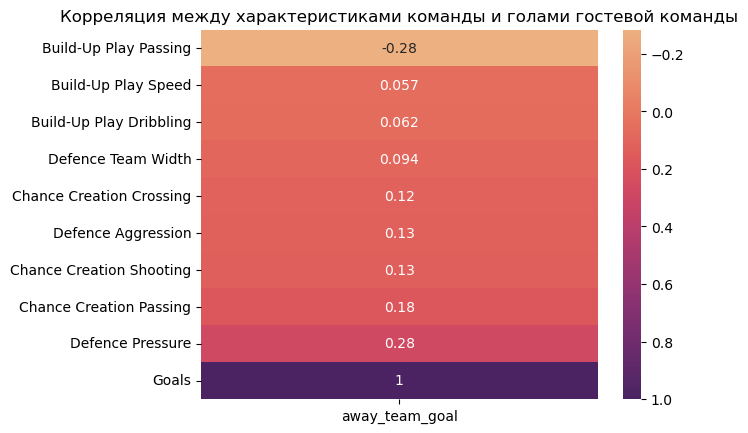

In [37]:
#выявим корреляцию между забитыми голами и характеристиками команды

team_attributes_goals = corr_map[['away_team_goal','buildUpPlayPassing', 'buildUpPlaySpeed',
       'buildUpPlayDribbling', 'defenceTeamWidth', 'chanceCreationCrossing',
       'defenceAggression', 'chanceCreationShooting', 'chanceCreationPassing',
       'defencePressure']]
sns.heatmap(team_attributes_goals.corr()[["away_team_goal"]].sort_values(by='away_team_goal', ascending=True), annot=True, cmap="flare", yticklabels=["Build-Up Play Passing", "Build-Up Play Speed", "Build-Up Play Dribbling", "Defence Team Width", "Chance Creation Crossing", "Defence Aggression", "Chance Creation Shooting", "Chance Creation Passing", "Defence Pressure", "Goals"])

plt.title('''Корреляция между характеристиками команды и голами гостевой команды''')
plt.gcf().axes[1].invert_yaxis()
plt.show()

In [38]:
df2.columns

Index(['team_api_id', 'date', 'buildUpPlayPassing', 'buildUpPlaySpeed',
       'buildUpPlayDribbling', 'defenceTeamWidth', 'chanceCreationCrossing',
       'defenceAggression', 'chanceCreationShooting', 'chanceCreationPassing',
       'defencePressure', 'team_attr_date', 'time'],
      dtype='object')

In [39]:
# Сохраняем столбцы, которые нам понадобятся в будущем
df2 = df2[['team_api_id', 'team_attr_date', 'buildUpPlayPassing', 'buildUpPlaySpeed',
       'buildUpPlayDribbling', 'defenceTeamWidth', 'chanceCreationCrossing',
       'defenceAggression', 'chanceCreationShooting', 'chanceCreationPassing',
       'defencePressure']]
df2

,team_api_id,team_attr_date,buildUpPlayPassing,buildUpPlaySpeed,buildUpPlayDribbling,defenceTeamWidth,chanceCreationCrossing,defenceAggression,chanceCreationShooting,chanceCreationPassing,defencePressure
0,9930,2010-02-22,50,60,NaN,45,65,55,55,60,50
1,9930,2014-09-19,56,52,48.0,54,63,44,64,54,47
2,9930,2015-09-10,54,47,41.0,54,63,44,64,54,47
3,8485,2010-02-22,70,70,NaN,70,70,70,70,70,60
4,8485,2011-02-22,52,47,NaN,52,48,47,52,53,47
...,...,...,...,...,...,...,...,...,...,...,...
1453,10000,2011-02-22,52,52,NaN,53,48,48,53,52,46
1454,10000,2012-02-22,51,54,NaN,53,52,55,50,47,44
1455,10000,2013-09-20,51,54,NaN,37,52,58,32,47,44
1456,10000,2014-09-19,51,54,42.0,37,52,58,32,47,44


In [40]:
#Еще раз удостоверимся в правильности типов данных
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   team_api_id             1458 non-null   int64         
 1   team_attr_date          1458 non-null   datetime64[ns]
 2   buildUpPlayPassing      1458 non-null   int64         
 3   buildUpPlaySpeed        1458 non-null   int64         
 4   buildUpPlayDribbling    489 non-null    float64       
 5   defenceTeamWidth        1458 non-null   int64         
 6   chanceCreationCrossing  1458 non-null   int64         
 7   defenceAggression       1458 non-null   int64         
 8   chanceCreationShooting  1458 non-null   int64         
 9   chanceCreationPassing   1458 non-null   int64         
 10  defencePressure         1458 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(9)
memory usage: 125.4 KB


In [41]:
#Пропуски в данных есть
df2.isnull().sum()

team_api_id                 0
team_attr_date              0
buildUpPlayPassing          0
buildUpPlaySpeed            0
buildUpPlayDribbling      969
defenceTeamWidth            0
chanceCreationCrossing      0
defenceAggression           0
chanceCreationShooting      0
chanceCreationPassing       0
defencePressure             0
dtype: int64

In [42]:
#Колонка "buildUpPlayDribbling" содержит 2/3 NA значений, удаляем ее

df2.drop(columns=['buildUpPlayDribbling'], axis=1, inplace=True)



C:\Users\aweso\AppData\Local\Temp\ipykernel_9100\383071175.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(columns=['buildUpPlayDribbling'], axis=1, inplace=True)


In [43]:
#Проверим на наличие выбросов, их нет
df2.describe()

,team_api_id,buildUpPlayPassing,buildUpPlaySpeed,defenceTeamWidth,chanceCreationCrossing,defenceAggression,chanceCreationShooting,chanceCreationPassing,defencePressure
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,9995.727023,48.490398,52.462277,52.185871,53.731824,49.251029,53.969136,52.165295,46.017147
std,13264.869900,10.896101,11.545869,9.574712,11.086796,9.738028,10.327566,10.360793,10.227225
min,1601.000000,20.000000,20.000000,29.000000,20.000000,24.000000,22.000000,21.000000,23.000000
25%,8457.750000,40.000000,45.000000,47.000000,47.000000,44.000000,48.000000,46.000000,39.000000
50%,8674.000000,50.000000,52.000000,52.000000,53.000000,48.000000,53.000000,52.000000,45.000000
75%,9904.000000,55.000000,62.000000,58.000000,62.000000,55.000000,61.000000,59.000000,51.000000
max,274581.000000,80.000000,80.000000,73.000000,80.000000,72.000000,80.000000,80.000000,72.000000


In [44]:
df2.duplicated(subset=None, keep='first')

0       False
1       False
2       False
3       False
4       False
        ...  
1453    False
1454    False
1455    False
1456    False
1457    False
Length: 1458, dtype: bool

In [45]:
#Получаем дубрирующиеся строки 
df2[df2.duplicated()]

,team_api_id,team_attr_date,buildUpPlayPassing,buildUpPlaySpeed,defenceTeamWidth,chanceCreationCrossing,defenceAggression,chanceCreationShooting,chanceCreationPassing,defencePressure
860,9996,2015-09-10,50,50,50,50,45,50,50,45


In [46]:
#Датасет без полных дубликатов
df2[~df2.duplicated()]

,team_api_id,team_attr_date,buildUpPlayPassing,buildUpPlaySpeed,defenceTeamWidth,chanceCreationCrossing,defenceAggression,chanceCreationShooting,chanceCreationPassing,defencePressure
0,9930,2010-02-22,50,60,45,65,55,55,60,50
1,9930,2014-09-19,56,52,54,63,44,64,54,47
2,9930,2015-09-10,54,47,54,63,44,64,54,47
3,8485,2010-02-22,70,70,70,70,70,70,70,60
4,8485,2011-02-22,52,47,52,48,47,52,53,47
...,...,...,...,...,...,...,...,...,...,...
1453,10000,2011-02-22,52,52,53,48,48,53,52,46
1454,10000,2012-02-22,51,54,53,52,55,50,47,44
1455,10000,2013-09-20,51,54,37,52,58,32,47,44
1456,10000,2014-09-19,51,54,37,52,58,32,47,44


In [47]:
#Удаляем дубликаты
df2.drop_duplicates(inplace=True)

C:\Users\aweso\AppData\Local\Temp\ipykernel_9100\2868760660.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop_duplicates(inplace=True)


In [48]:
# Так как характеристики варьируются по годам, создадим отдельный столбец с годами
df2['team_attr_year'] = df2['team_attr_date'].dt.year
df2

C:\Users\aweso\AppData\Local\Temp\ipykernel_9100\1826666732.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['team_attr_year'] = df2['team_attr_date'].dt.year


,team_api_id,team_attr_date,buildUpPlayPassing,buildUpPlaySpeed,defenceTeamWidth,chanceCreationCrossing,defenceAggression,chanceCreationShooting,chanceCreationPassing,defencePressure,team_attr_year
0,9930,2010-02-22,50,60,45,65,55,55,60,50,2010
1,9930,2014-09-19,56,52,54,63,44,64,54,47,2014
2,9930,2015-09-10,54,47,54,63,44,64,54,47,2015
3,8485,2010-02-22,70,70,70,70,70,70,70,60,2010
4,8485,2011-02-22,52,47,52,48,47,52,53,47,2011
...,...,...,...,...,...,...,...,...,...,...,...
1453,10000,2011-02-22,52,52,53,48,48,53,52,46,2011
1454,10000,2012-02-22,51,54,53,52,55,50,47,44,2012
1455,10000,2013-09-20,51,54,37,52,58,32,47,44,2013
1456,10000,2014-09-19,51,54,37,52,58,32,47,44,2014


In [49]:
df2.columns

Index(['team_api_id', 'team_attr_date', 'buildUpPlayPassing',
       'buildUpPlaySpeed', 'defenceTeamWidth', 'chanceCreationCrossing',
       'defenceAggression', 'chanceCreationShooting', 'chanceCreationPassing',
       'defencePressure', 'team_attr_year'],
      dtype='object')

In [50]:
# Окончательная версия второго датафрейма
df2 = df2[['team_api_id','team_attr_year',
        'defenceAggression', 'chanceCreationShooting',
       'chanceCreationPassing', 'defencePressure']]
df2

,team_api_id,team_attr_year,defenceAggression,chanceCreationShooting,chanceCreationPassing,defencePressure
0,9930,2010,55,55,60,50
1,9930,2014,44,64,54,47
2,9930,2015,44,64,54,47
3,8485,2010,70,70,70,60
4,8485,2011,47,52,53,47
...,...,...,...,...,...,...
1453,10000,2011,48,53,52,46
1454,10000,2012,55,50,47,44
1455,10000,2013,58,32,47,44
1456,10000,2014,58,32,47,44


# Единый датасет. Объединяем по годам и с наиболее коррелирующими командными характеристиками, затем конкатенируем их в общий датафрейм

In [51]:
#Смотрим, какие года представлены в первом датасете
df_match['year'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype=int64)

In [52]:
#Смотрим, какие года представлены во втором датасете
df2['team_attr_year'].unique()

array([2010, 2014, 2015, 2011, 2012, 2013], dtype=int64)

In [53]:
#Разбиваем оба датасета по совпадающим годам
df2_2010 = df2[df2['team_attr_year']==2010]
df2_2011 = df2[df2['team_attr_year']==2011]
df2_2012 = df2[df2['team_attr_year']==2012]
df2_2013 = df2[df2['team_attr_year']==2013]
df2_2014 = df2[df2['team_attr_year']==2014]
df2_2015 = df2[df2['team_attr_year']==2015]

df_match_2010 = df_match[df_match['year']==2010]
df_match_2011 = df_match[df_match['year']==2011]
df_match_2012 = df_match[df_match['year']==2012]
df_match_2013 = df_match[df_match['year']==2013]
df_match_2014 = df_match[df_match['year']==2014]
df_match_2015 = df_match[df_match['year']==2015]

### 2010

In [54]:

#Сначала присоединяем командные характеристики к домашней команде
df_match_2010 = df_match_2010.merge(df2_2010, how='left', left_on='home_team_api_id', right_on='team_api_id')

df_match_2010.rename(columns={'defenceAggression': 'home_defenceAggression', 'chanceCreationShooting': 'home_chanceCreationShooting', 'chanceCreationPassing': 'home_chanceCreationPassing', 'defencePressure': 'home_defencePressure'}, inplace=True)

df_match_2010.drop(columns=['team_api_id'], axis=1, inplace=True)
df_match_2010.columns


Index(['id', 'date', 'match_api_id', 'home_team_goal', 'away_team_goal',
       'year', 'start_season', 'end_season', 'country_name', 'league_name',
       'home_team_name', 'home_team_api_id', 'away_team_name',
       'away_team_api_id', 'winner', 'team_attr_year',
       'home_defenceAggression', 'home_chanceCreationShooting',
       'home_chanceCreationPassing', 'home_defencePressure'],
      dtype='object')

In [55]:
df_match_2010 = df_match_2010[['id', 'date', 'match_api_id', 'home_team_goal', 'away_team_goal',
       'year', 'start_season', 'end_season', 'country_name', 'league_name',
       'home_team_name', 'home_team_api_id', 
       'home_defenceAggression', 'home_chanceCreationShooting',
       'home_chanceCreationPassing', 'home_defencePressure',
       'away_team_name',
       'away_team_api_id', 'winner'
        ]]
df_match_2010

,id,date,match_api_id,home_team_goal,away_team_goal,year,start_season,end_season,country_name,league_name,home_team_name,home_team_api_id,home_defenceAggression,home_chanceCreationShooting,home_chanceCreationPassing,home_defencePressure,away_team_name,away_team_api_id,winner
0,412,2010-01-24,665674,2,0,2010,2009,2010,Belgium,Belgium Jupiler League,KRC Genk,9987,65.0,60.0,50.0,70.0,Club Brugge KV,8342,3
1,427,2010-02-07,665699,1,0,2010,2009,2010,Belgium,Belgium Jupiler League,KRC Genk,9987,65.0,60.0,50.0,70.0,Standard de Liège,9985,3
2,442,2010-02-19,665730,3,1,2010,2009,2010,Belgium,Belgium Jupiler League,KRC Genk,9987,65.0,60.0,50.0,70.0,Sporting Lokeren,9994,3
3,469,2010-03-21,665763,1,1,2010,2009,2010,Belgium,Belgium Jupiler League,KRC Genk,9987,65.0,60.0,50.0,70.0,KV Kortrijk,8571,1
4,524,2010-08-01,838476,2,1,2010,2010,2011,Belgium,Belgium Jupiler League,KRC Genk,9987,65.0,60.0,50.0,70.0,Beerschot AC,9993,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3245,24964,2010-12-11,845110,0,0,2010,2010,2011,Switzerland,Switzerland Super League,FC Thun,10191,NaN,NaN,NaN,NaN,AC Bellinzona,6493,1
3246,25032,2010-08-01,845038,2,2,2010,2010,2011,Switzerland,Switzerland Super League,FC Thun,10191,NaN,NaN,NaN,NaN,Grasshopper Club Zürich,9956,1
3247,25072,2010-08-08,845043,3,0,2010,2010,2011,Switzerland,Switzerland Super League,FC Thun,10191,NaN,NaN,NaN,NaN,FC St. Gallen,10190,3
3248,25079,2010-08-21,845050,1,1,2010,2010,2011,Switzerland,Switzerland Super League,FC Thun,10191,NaN,NaN,NaN,NaN,FC Basel,9931,1


In [56]:
#Теперь присоединяем командные характеристики к выездной команде
df_match_2010 = df_match_2010.merge(df2_2010, how='inner', left_on='away_team_api_id', right_on='team_api_id')

df_match_2010.rename(columns={'defenceAggression': 'away_defenceAggression', 'chanceCreationShooting': 'away_chanceCreationShooting', 'chanceCreationPassing': 'away_chanceCreationPassing', 'defencePressure': 'away_defencePressure'}, inplace=True)

df_match_2010.drop(columns=['team_api_id'], axis=1, inplace=True)
df_match_2010.columns

Index(['id', 'date', 'match_api_id', 'home_team_goal', 'away_team_goal',
       'year', 'start_season', 'end_season', 'country_name', 'league_name',
       'home_team_name', 'home_team_api_id', 'home_defenceAggression',
       'home_chanceCreationShooting', 'home_chanceCreationPassing',
       'home_defencePressure', 'away_team_name', 'away_team_api_id', 'winner',
       'team_attr_year', 'away_defenceAggression',
       'away_chanceCreationShooting', 'away_chanceCreationPassing',
       'away_defencePressure'],
      dtype='object')

In [57]:
df_match_2010 = df_match_2010[['id', 'date', 'match_api_id', 'home_team_goal', 'away_team_goal',
       'year', 'start_season', 'end_season', 'country_name', 'league_name',
       'home_team_name', 'home_team_api_id', 'home_defenceAggression',
       'home_chanceCreationShooting', 'home_chanceCreationPassing',
       'home_defencePressure', 'away_team_name', 'away_team_api_id',
        'away_defenceAggression',
       'away_chanceCreationShooting', 'away_chanceCreationPassing',
       'away_defencePressure', 'winner',
        ]]

In [58]:
df_match_2010.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3171 entries, 0 to 3170
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           3171 non-null   int64         
 1   date                         3171 non-null   datetime64[ns]
 2   match_api_id                 3171 non-null   int64         
 3   home_team_goal               3171 non-null   int64         
 4   away_team_goal               3171 non-null   int64         
 5   year                         3171 non-null   int64         
 6   start_season                 3171 non-null   object        
 7   end_season                   3171 non-null   object        
 8   country_name                 3171 non-null   object        
 9   league_name                  3171 non-null   object        
 10  home_team_name               3171 non-null   object        
 11  home_team_api_id             3171 non-null 

### 2011

In [59]:
#Сначала присоединяем командные характеристики к домашней команде
df_match_2011 = df_match_2011.merge(df2_2011, how='inner', left_on='home_team_api_id', right_on='team_api_id')

df_match_2011.rename(columns={'defenceAggression': 'home_defenceAggression', 'chanceCreationShooting': 'home_chanceCreationShooting', 'chanceCreationPassing': 'home_chanceCreationPassing', 'defencePressure': 'home_defencePressure'}, inplace=True)

df_match_2011.drop(columns=['team_api_id'], axis=1, inplace=True)
df_match_2011.columns



Index(['id', 'date', 'match_api_id', 'home_team_goal', 'away_team_goal',
       'year', 'start_season', 'end_season', 'country_name', 'league_name',
       'home_team_name', 'home_team_api_id', 'away_team_name',
       'away_team_api_id', 'winner', 'team_attr_year',
       'home_defenceAggression', 'home_chanceCreationShooting',
       'home_chanceCreationPassing', 'home_defencePressure'],
      dtype='object')

In [60]:
df_match_2011 = df_match_2011[['id', 'date', 'match_api_id', 'home_team_goal', 'away_team_goal',
       'year', 'start_season', 'end_season', 'country_name', 'league_name',
       'home_team_name', 'home_team_api_id', 
       'home_defenceAggression', 'home_chanceCreationShooting',
       'home_chanceCreationPassing', 'home_defencePressure','away_team_name',
       'away_team_api_id', 'winner'
        ]]
df_match_2011.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3171 entries, 0 to 3170
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           3171 non-null   int64         
 1   date                         3171 non-null   datetime64[ns]
 2   match_api_id                 3171 non-null   int64         
 3   home_team_goal               3171 non-null   int64         
 4   away_team_goal               3171 non-null   int64         
 5   year                         3171 non-null   int64         
 6   start_season                 3171 non-null   object        
 7   end_season                   3171 non-null   object        
 8   country_name                 3171 non-null   object        
 9   league_name                  3171 non-null   object        
 10  home_team_name               3171 non-null   object        
 11  home_team_api_id             3171 non-null 

In [61]:
#Теперь присоединяем командные характеристики к выездной команде
df_match_2011 = df_match_2011.merge(df2_2011, how='inner', left_on='away_team_api_id', right_on='team_api_id')

df_match_2011.rename(columns={'defenceAggression': 'away_defenceAggression', 'chanceCreationShooting': 'away_chanceCreationShooting', 'chanceCreationPassing': 'away_chanceCreationPassing', 'defencePressure': 'away_defencePressure'}, inplace=True)

df_match_2011.drop(columns=['team_api_id'], axis=1, inplace=True)

In [62]:
df_match_2011.columns

Index(['id', 'date', 'match_api_id', 'home_team_goal', 'away_team_goal',
       'year', 'start_season', 'end_season', 'country_name', 'league_name',
       'home_team_name', 'home_team_api_id', 'home_defenceAggression',
       'home_chanceCreationShooting', 'home_chanceCreationPassing',
       'home_defencePressure', 'away_team_name', 'away_team_api_id', 'winner',
       'team_attr_year', 'away_defenceAggression',
       'away_chanceCreationShooting', 'away_chanceCreationPassing',
       'away_defencePressure'],
      dtype='object')

In [63]:
df_match_2011 = df_match_2011[['id', 'date', 'match_api_id', 'home_team_goal', 'away_team_goal',
       'year', 'start_season', 'end_season', 'country_name', 'league_name',
       'home_team_name', 'home_team_api_id', 'home_defenceAggression',
       'home_chanceCreationShooting', 'home_chanceCreationPassing',
       'home_defencePressure', 'away_team_name', 'away_team_api_id',
    'away_defenceAggression',
       'away_chanceCreationShooting', 'away_chanceCreationPassing',
       'away_defencePressure','winner'
        ]]

In [64]:
df_match_2011.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3089 entries, 0 to 3088
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           3089 non-null   int64         
 1   date                         3089 non-null   datetime64[ns]
 2   match_api_id                 3089 non-null   int64         
 3   home_team_goal               3089 non-null   int64         
 4   away_team_goal               3089 non-null   int64         
 5   year                         3089 non-null   int64         
 6   start_season                 3089 non-null   object        
 7   end_season                   3089 non-null   object        
 8   country_name                 3089 non-null   object        
 9   league_name                  3089 non-null   object        
 10  home_team_name               3089 non-null   object        
 11  home_team_api_id             3089 non-null 

### 2012

In [65]:
#Сначала присоединяем командные характеристики к домашней команде
df_match_2012 = df_match_2012.merge(df2_2012, how='inner', left_on='home_team_api_id', right_on='team_api_id')

df_match_2012.rename(columns={'defenceAggression': 'home_defenceAggression', 'chanceCreationShooting': 'home_chanceCreationShooting', 'chanceCreationPassing': 'home_chanceCreationPassing', 'defencePressure': 'home_defencePressure'}, inplace=True)

df_match_2012.drop(columns=['team_api_id'], axis=1, inplace=True)
df_match_2012.columns



Index(['id', 'date', 'match_api_id', 'home_team_goal', 'away_team_goal',
       'year', 'start_season', 'end_season', 'country_name', 'league_name',
       'home_team_name', 'home_team_api_id', 'away_team_name',
       'away_team_api_id', 'winner', 'team_attr_year',
       'home_defenceAggression', 'home_chanceCreationShooting',
       'home_chanceCreationPassing', 'home_defencePressure'],
      dtype='object')

In [66]:
df_match_2012 = df_match_2012[['id', 'date', 'match_api_id', 'home_team_goal', 'away_team_goal',
       'year', 'start_season', 'end_season', 'country_name', 'league_name',
       'home_team_name', 'home_team_api_id', 
       'home_defenceAggression', 'home_chanceCreationShooting',
       'home_chanceCreationPassing', 'home_defencePressure','away_team_name',
       'away_team_api_id', 'winner',
        ]]


In [67]:
#Теперь присоединяем командные характеристики к выездной команде
df_match_2012 = df_match_2012.merge(df2_2012, how='inner', left_on='away_team_api_id', right_on='team_api_id')

df_match_2012.rename(columns={'defenceAggression': 'away_defenceAggression', 'chanceCreationShooting': 'away_chanceCreationShooting', 'chanceCreationPassing': 'away_chanceCreationPassing', 'defencePressure': 'away_defencePressure'}, inplace=True)

df_match_2012.drop(columns=['team_api_id'], axis=1, inplace=True)
df_match_2012.columns

Index(['id', 'date', 'match_api_id', 'home_team_goal', 'away_team_goal',
       'year', 'start_season', 'end_season', 'country_name', 'league_name',
       'home_team_name', 'home_team_api_id', 'home_defenceAggression',
       'home_chanceCreationShooting', 'home_chanceCreationPassing',
       'home_defencePressure', 'away_team_name', 'away_team_api_id', 'winner',
       'team_attr_year', 'away_defenceAggression',
       'away_chanceCreationShooting', 'away_chanceCreationPassing',
       'away_defencePressure'],
      dtype='object')

In [68]:
df_match_2012 = df_match_2012[['id', 'date', 'match_api_id', 'home_team_goal', 'away_team_goal',
       'year', 'start_season', 'end_season', 'country_name', 'league_name',
       'home_team_name', 'home_team_api_id', 'home_defenceAggression',
       'home_chanceCreationShooting', 'home_chanceCreationPassing',
       'home_defencePressure', 'away_team_name', 'away_team_api_id', 
        'away_defenceAggression',
       'away_chanceCreationShooting', 'away_chanceCreationPassing',
       'away_defencePressure', 'winner'
        ]]
df_match_2012.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3040 entries, 0 to 3039
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           3040 non-null   int64         
 1   date                         3040 non-null   datetime64[ns]
 2   match_api_id                 3040 non-null   int64         
 3   home_team_goal               3040 non-null   int64         
 4   away_team_goal               3040 non-null   int64         
 5   year                         3040 non-null   int64         
 6   start_season                 3040 non-null   object        
 7   end_season                   3040 non-null   object        
 8   country_name                 3040 non-null   object        
 9   league_name                  3040 non-null   object        
 10  home_team_name               3040 non-null   object        
 11  home_team_api_id             3040 non-null 

### 2013

In [69]:
#Сначала присоединяем командные характеристики к домашней команде
df_match_2013 = df_match_2013.merge(df2_2013, how='inner', left_on='home_team_api_id', right_on='team_api_id')

df_match_2013.rename(columns={'defenceAggression': 'home_defenceAggression', 'chanceCreationShooting': 'home_chanceCreationShooting', 'chanceCreationPassing': 'home_chanceCreationPassing', 'defencePressure': 'home_defencePressure'}, inplace=True)

df_match_2013.drop(columns=['team_api_id'], axis=1, inplace=True)
df_match_2013.columns



Index(['id', 'date', 'match_api_id', 'home_team_goal', 'away_team_goal',
       'year', 'start_season', 'end_season', 'country_name', 'league_name',
       'home_team_name', 'home_team_api_id', 'away_team_name',
       'away_team_api_id', 'winner', 'team_attr_year',
       'home_defenceAggression', 'home_chanceCreationShooting',
       'home_chanceCreationPassing', 'home_defencePressure'],
      dtype='object')

In [70]:
df_match_2013 = df_match_2013[['id', 'date', 'match_api_id', 'home_team_goal', 'away_team_goal',
       'year', 'start_season', 'end_season', 'country_name', 'league_name',
       'home_team_name', 'home_team_api_id', 
       'home_defenceAggression', 'home_chanceCreationShooting',
       'home_chanceCreationPassing', 'home_defencePressure','away_team_name',
       'away_team_api_id', 'winner'
        ]]


In [71]:
#Теперь присоединяем командные характеристики к выездной команде
df_match_2013 = df_match_2013.merge(df2_2013, how='inner', left_on='away_team_api_id', right_on='team_api_id')

df_match_2013.rename(columns={'defenceAggression': 'away_defenceAggression', 'chanceCreationShooting': 'away_chanceCreationShooting', 'chanceCreationPassing': 'away_chanceCreationPassing', 'defencePressure': 'away_defencePressure'}, inplace=True)

df_match_2013.drop(columns=['team_api_id'], axis=1, inplace=True)
df_match_2013.columns
                   

Index(['id', 'date', 'match_api_id', 'home_team_goal', 'away_team_goal',
       'year', 'start_season', 'end_season', 'country_name', 'league_name',
       'home_team_name', 'home_team_api_id', 'home_defenceAggression',
       'home_chanceCreationShooting', 'home_chanceCreationPassing',
       'home_defencePressure', 'away_team_name', 'away_team_api_id', 'winner',
       'team_attr_year', 'away_defenceAggression',
       'away_chanceCreationShooting', 'away_chanceCreationPassing',
       'away_defencePressure'],
      dtype='object')

In [72]:
df_match_2013 = df_match_2013[['id', 'date', 'match_api_id', 'home_team_goal', 'away_team_goal',
       'year', 'start_season', 'end_season', 'country_name', 'league_name',
       'home_team_name', 'home_team_api_id', 'home_defenceAggression',
       'home_chanceCreationShooting', 'home_chanceCreationPassing',
       'home_defencePressure', 'away_team_name', 'away_team_api_id',
        'away_defenceAggression',
       'away_chanceCreationShooting', 'away_chanceCreationPassing',
       'away_defencePressure','winner'
        ]]
df_match_2013.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2943 entries, 0 to 2942
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           2943 non-null   int64         
 1   date                         2943 non-null   datetime64[ns]
 2   match_api_id                 2943 non-null   int64         
 3   home_team_goal               2943 non-null   int64         
 4   away_team_goal               2943 non-null   int64         
 5   year                         2943 non-null   int64         
 6   start_season                 2943 non-null   object        
 7   end_season                   2943 non-null   object        
 8   country_name                 2943 non-null   object        
 9   league_name                  2943 non-null   object        
 10  home_team_name               2943 non-null   object        
 11  home_team_api_id             2943 non-null 

### 2014

In [73]:
#Сначала присоединяем командные характеристики к домашней команде
df_match_2014 = df_match_2014.merge(df2_2014, how='inner', left_on='home_team_api_id', right_on='team_api_id')

df_match_2014.rename(columns={'defenceAggression': 'home_defenceAggression', 'chanceCreationShooting': 'home_chanceCreationShooting', 'chanceCreationPassing': 'home_chanceCreationPassing', 'defencePressure': 'home_defencePressure'}, inplace=True)

df_match_2014.drop(columns=['team_api_id'], axis=1, inplace=True)
df_match_2014.columns


Index(['id', 'date', 'match_api_id', 'home_team_goal', 'away_team_goal',
       'year', 'start_season', 'end_season', 'country_name', 'league_name',
       'home_team_name', 'home_team_api_id', 'away_team_name',
       'away_team_api_id', 'winner', 'team_attr_year',
       'home_defenceAggression', 'home_chanceCreationShooting',
       'home_chanceCreationPassing', 'home_defencePressure'],
      dtype='object')

In [74]:
df_match_2014 = df_match_2014[['id', 'date', 'match_api_id', 'home_team_goal', 'away_team_goal',
       'year', 'start_season', 'end_season', 'country_name', 'league_name',
       'home_team_name', 'home_team_api_id', 
       'home_defenceAggression', 'home_chanceCreationShooting',
       'home_chanceCreationPassing', 'home_defencePressure','away_team_name',
       'away_team_api_id', 'winner'
        ]]
#Теперь присоединяем командные характеристики к выездной команде
df_match_2014 = df_match_2014.merge(df2_2014, how='inner', left_on='away_team_api_id', right_on='team_api_id')

df_match_2014.rename(columns={'defenceAggression': 'away_defenceAggression', 'chanceCreationShooting': 'away_chanceCreationShooting', 'chanceCreationPassing': 'away_chanceCreationPassing', 'defencePressure': 'away_defencePressure'}, inplace=True)

df_match_2014.drop(columns=['team_api_id'], axis=1, inplace=True)
df_match_2014.columns

Index(['id', 'date', 'match_api_id', 'home_team_goal', 'away_team_goal',
       'year', 'start_season', 'end_season', 'country_name', 'league_name',
       'home_team_name', 'home_team_api_id', 'home_defenceAggression',
       'home_chanceCreationShooting', 'home_chanceCreationPassing',
       'home_defencePressure', 'away_team_name', 'away_team_api_id', 'winner',
       'team_attr_year', 'away_defenceAggression',
       'away_chanceCreationShooting', 'away_chanceCreationPassing',
       'away_defencePressure'],
      dtype='object')

In [75]:
df_match_2014 = df_match_2014[['id', 'date', 'match_api_id', 'home_team_goal', 'away_team_goal',
       'year', 'start_season', 'end_season', 'country_name', 'league_name',
       'home_team_name', 'home_team_api_id', 'home_defenceAggression',
       'home_chanceCreationShooting', 'home_chanceCreationPassing',
       'home_defencePressure', 'away_team_name', 'away_team_api_id', 
        'away_defenceAggression',
       'away_chanceCreationShooting', 'away_chanceCreationPassing',
       'away_defencePressure','winner'
        ]]
df_match_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2924 entries, 0 to 2923
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           2924 non-null   int64         
 1   date                         2924 non-null   datetime64[ns]
 2   match_api_id                 2924 non-null   int64         
 3   home_team_goal               2924 non-null   int64         
 4   away_team_goal               2924 non-null   int64         
 5   year                         2924 non-null   int64         
 6   start_season                 2924 non-null   object        
 7   end_season                   2924 non-null   object        
 8   country_name                 2924 non-null   object        
 9   league_name                  2924 non-null   object        
 10  home_team_name               2924 non-null   object        
 11  home_team_api_id             2924 non-null 

### 2015

In [76]:
#Сначала присоединяем командные характеристики к домашней команде
df_match_2015 = df_match_2015.merge(df2_2015, how='inner', left_on='home_team_api_id', right_on='team_api_id')

df_match_2015.rename(columns={'defenceAggression': 'home_defenceAggression', 'chanceCreationShooting': 'home_chanceCreationShooting', 'chanceCreationPassing': 'home_chanceCreationPassing', 'defencePressure': 'home_defencePressure'}, inplace=True)

df_match_2015.drop(columns=['team_api_id'], axis=1, inplace=True)
df_match_2015.columns


Index(['id', 'date', 'match_api_id', 'home_team_goal', 'away_team_goal',
       'year', 'start_season', 'end_season', 'country_name', 'league_name',
       'home_team_name', 'home_team_api_id', 'away_team_name',
       'away_team_api_id', 'winner', 'team_attr_year',
       'home_defenceAggression', 'home_chanceCreationShooting',
       'home_chanceCreationPassing', 'home_defencePressure'],
      dtype='object')

In [77]:
df_match_2015 = df_match_2015[['id', 'date', 'match_api_id', 'home_team_goal', 'away_team_goal',
       'year', 'start_season', 'end_season', 'country_name', 'league_name',
       'home_team_name', 'home_team_api_id',
       'home_defenceAggression', 'home_chanceCreationShooting',
       'home_chanceCreationPassing', 'home_defencePressure','away_team_name',
       'away_team_api_id', 'winner'
        ]]
#Теперь присоединяем командные характеристики к выездной команде
df_match_2015 = df_match_2015.merge(df2_2015, how='inner', left_on='away_team_api_id', right_on='team_api_id')

df_match_2015.rename(columns={'defenceAggression': 'away_defenceAggression', 'chanceCreationShooting': 'away_chanceCreationShooting', 'chanceCreationPassing': 'away_chanceCreationPassing', 'defencePressure': 'away_defencePressure'}, inplace=True)

df_match_2015.drop(columns=['team_api_id'], axis=1, inplace=True)
df_match_2015.columns

Index(['id', 'date', 'match_api_id', 'home_team_goal', 'away_team_goal',
       'year', 'start_season', 'end_season', 'country_name', 'league_name',
       'home_team_name', 'home_team_api_id', 'home_defenceAggression',
       'home_chanceCreationShooting', 'home_chanceCreationPassing',
       'home_defencePressure', 'away_team_name', 'away_team_api_id', 'winner',
       'team_attr_year', 'away_defenceAggression',
       'away_chanceCreationShooting', 'away_chanceCreationPassing',
       'away_defencePressure'],
      dtype='object')

In [78]:
df_match_2015 = df_match_2015[['id', 'date', 'match_api_id', 'home_team_goal', 'away_team_goal',
       'year', 'start_season', 'end_season', 'country_name', 'league_name',
       'home_team_name', 'home_team_api_id', 'home_defenceAggression',
       'home_chanceCreationShooting', 'home_chanceCreationPassing',
       'home_defencePressure', 'away_team_name', 'away_team_api_id', 
        'away_defenceAggression',
       'away_chanceCreationShooting', 'away_chanceCreationPassing',
       'away_defencePressure','winner'
        ]]
df_match_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3153 entries, 0 to 3152
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           3153 non-null   int64         
 1   date                         3153 non-null   datetime64[ns]
 2   match_api_id                 3153 non-null   int64         
 3   home_team_goal               3153 non-null   int64         
 4   away_team_goal               3153 non-null   int64         
 5   year                         3153 non-null   int64         
 6   start_season                 3153 non-null   object        
 7   end_season                   3153 non-null   object        
 8   country_name                 3153 non-null   object        
 9   league_name                  3153 non-null   object        
 10  home_team_name               3153 non-null   object        
 11  home_team_api_id             3153 non-null 

In [79]:
#Создаем еще 2 новых столбца home_team_points и away_team_points
def foo(row):
    if row.winner==3:
        return 3
    elif row.winner==0:
        return 0
    else:
        return 1

df_match_2015['home_team_points']=df_match_2015.apply(foo, axis=1)




def hoo(row):
    if row.winner==3:
        return 0
    elif row.winner==0:
        return 3
    else:
        return 1

df_match_2015['away_team_points']=df_match_2015.apply(hoo, axis=1)


df_match_2015

,id,date,match_api_id,home_team_goal,away_team_goal,year,start_season,end_season,country_name,league_name,...,home_defencePressure,away_team_name,away_team_api_id,away_defenceAggression,away_chanceCreationShooting,away_chanceCreationPassing,away_defencePressure,winner,home_team_points,away_team_points
0,1355,2015-02-03,1717979,1,1,2015,2014,2015,Belgium,Belgium Jupiler League,...,36,KV Oostende,8573,47,53,45,42,1,1,1
1,1435,2015-03-15,1718051,1,4,2015,2014,2015,Belgium,Belgium Jupiler League,...,44,KV Oostende,8573,47,53,45,42,0,0,3
2,1596,2015-12-27,1979987,1,0,2015,2015,2016,Belgium,Belgium Jupiler League,...,44,KV Oostende,8573,47,53,45,42,3,3,0
3,1371,2015-01-25,1717995,3,1,2015,2014,2015,Belgium,Belgium Jupiler League,...,49,KV Oostende,8573,47,53,45,42,3,3,0
4,1514,2015-10-24,1979913,2,2,2015,2015,2016,Belgium,Belgium Jupiler League,...,49,KV Oostende,8573,47,53,45,42,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3148,25914,2015-08-02,1992065,2,3,2015,2015,2016,Switzerland,Switzerland Super League,...,47,Grasshopper Club Zürich,9956,43,46,52,36,0,0,3
3149,25694,2015-03-01,1775105,1,1,2015,2014,2015,Switzerland,Switzerland Super League,...,40,Grasshopper Club Zürich,9956,43,46,52,36,1,1,1
3150,25962,2015-08-23,1992078,0,2,2015,2015,2016,Switzerland,Switzerland Super League,...,40,Grasshopper Club Zürich,9956,43,46,52,36,0,0,3
3151,25701,2015-03-14,1775112,2,2,2015,2014,2015,Switzerland,Switzerland Super League,...,47,Grasshopper Club Zürich,9956,43,46,52,36,1,1,1


### Единый датафрейм по всем годам

In [80]:
final_df_all_years = pd.concat([
    df_match_2010,
    df_match_2011,
    df_match_2012,
    df_match_2013,
    df_match_2014,
    df_match_2015
], axis = 0)

final_df_all_years

,id,date,match_api_id,home_team_goal,away_team_goal,year,start_season,end_season,country_name,league_name,...,home_defencePressure,away_team_name,away_team_api_id,away_defenceAggression,away_chanceCreationShooting,away_chanceCreationPassing,away_defencePressure,winner,home_team_points,away_team_points
0,412,2010-01-24,665674,2,0,2010,2009,2010,Belgium,Belgium Jupiler League,...,70.0,Club Brugge KV,8342,70,45,45,60,3,NaN,NaN
1,428,2010-02-07,665700,1,1,2010,2009,2010,Belgium,Belgium Jupiler League,...,70.0,Club Brugge KV,8342,70,45,45,60,1,NaN,NaN
2,536,2010-10-15,838594,2,3,2010,2010,2011,Belgium,Belgium Jupiler League,...,70.0,Club Brugge KV,8342,70,45,45,60,0,NaN,NaN
3,700,2010-08-15,838500,3,1,2010,2010,2011,Belgium,Belgium Jupiler League,...,65.0,Club Brugge KV,8342,70,45,45,60,3,NaN,NaN
4,436,2010-02-14,665721,1,1,2010,2009,2010,Belgium,Belgium Jupiler League,...,45.0,Club Brugge KV,8342,70,45,45,60,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3148,25914,2015-08-02,1992065,2,3,2015,2015,2016,Switzerland,Switzerland Super League,...,47.0,Grasshopper Club Zürich,9956,43,46,52,36,0,0.0,3.0
3149,25694,2015-03-01,1775105,1,1,2015,2014,2015,Switzerland,Switzerland Super League,...,40.0,Grasshopper Club Zürich,9956,43,46,52,36,1,1.0,1.0
3150,25962,2015-08-23,1992078,0,2,2015,2015,2016,Switzerland,Switzerland Super League,...,40.0,Grasshopper Club Zürich,9956,43,46,52,36,0,0.0,3.0
3151,25701,2015-03-14,1775112,2,2,2015,2014,2015,Switzerland,Switzerland Super League,...,47.0,Grasshopper Club Zürich,9956,43,46,52,36,1,1.0,1.0


In [81]:
final_df_all_years.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18320 entries, 0 to 3152
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           18320 non-null  int64         
 1   date                         18320 non-null  datetime64[ns]
 2   match_api_id                 18320 non-null  int64         
 3   home_team_goal               18320 non-null  int64         
 4   away_team_goal               18320 non-null  int64         
 5   year                         18320 non-null  int64         
 6   start_season                 18320 non-null  object        
 7   end_season                   18320 non-null  object        
 8   country_name                 18320 non-null  object        
 9   league_name                  18320 non-null  object        
 10  home_team_name               18320 non-null  object        
 11  home_team_api_id             18320 non-nul

In [82]:
#Создаем еще 2 новых столбца home_team_points и away_team_points
def foo(row):
    if row.winner==3:
        return 3
    elif row.winner==0:
        return 0
    else:
        return 1

final_df_all_years['home_team_points']=final_df_all_years.apply(foo, axis=1)




def hoo(row):
    if row.winner==3:
        return 0
    elif row.winner==0:
        return 3
    else:
        return 1

final_df_all_years['away_team_points']=final_df_all_years.apply(hoo, axis=1)


final_df_all_years
    


,id,date,match_api_id,home_team_goal,away_team_goal,year,start_season,end_season,country_name,league_name,...,home_defencePressure,away_team_name,away_team_api_id,away_defenceAggression,away_chanceCreationShooting,away_chanceCreationPassing,away_defencePressure,winner,home_team_points,away_team_points
0,412,2010-01-24,665674,2,0,2010,2009,2010,Belgium,Belgium Jupiler League,...,70.0,Club Brugge KV,8342,70,45,45,60,3,3,0
1,428,2010-02-07,665700,1,1,2010,2009,2010,Belgium,Belgium Jupiler League,...,70.0,Club Brugge KV,8342,70,45,45,60,1,1,1
2,536,2010-10-15,838594,2,3,2010,2010,2011,Belgium,Belgium Jupiler League,...,70.0,Club Brugge KV,8342,70,45,45,60,0,0,3
3,700,2010-08-15,838500,3,1,2010,2010,2011,Belgium,Belgium Jupiler League,...,65.0,Club Brugge KV,8342,70,45,45,60,3,3,0
4,436,2010-02-14,665721,1,1,2010,2009,2010,Belgium,Belgium Jupiler League,...,45.0,Club Brugge KV,8342,70,45,45,60,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3148,25914,2015-08-02,1992065,2,3,2015,2015,2016,Switzerland,Switzerland Super League,...,47.0,Grasshopper Club Zürich,9956,43,46,52,36,0,0,3
3149,25694,2015-03-01,1775105,1,1,2015,2014,2015,Switzerland,Switzerland Super League,...,40.0,Grasshopper Club Zürich,9956,43,46,52,36,1,1,1
3150,25962,2015-08-23,1992078,0,2,2015,2015,2016,Switzerland,Switzerland Super League,...,40.0,Grasshopper Club Zürich,9956,43,46,52,36,0,0,3
3151,25701,2015-03-14,1775112,2,2,2015,2014,2015,Switzerland,Switzerland Super League,...,47.0,Grasshopper Club Zürich,9956,43,46,52,36,1,1,1


In [83]:
final_df_all_years.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18320 entries, 0 to 3152
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           18320 non-null  int64         
 1   date                         18320 non-null  datetime64[ns]
 2   match_api_id                 18320 non-null  int64         
 3   home_team_goal               18320 non-null  int64         
 4   away_team_goal               18320 non-null  int64         
 5   year                         18320 non-null  int64         
 6   start_season                 18320 non-null  object        
 7   end_season                   18320 non-null  object        
 8   country_name                 18320 non-null  object        
 9   league_name                  18320 non-null  object        
 10  home_team_name               18320 non-null  object        
 11  home_team_api_id             18320 non-nul

# Масштабирование данных

In [84]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

#Нормализуем данные столбцов 'home_defenceAggression',home_chanceCreationShooting,  home_chanceCreationPassing, home_defencePressure            

r = final_df_all_years['home_defenceAggression'].values.reshape(-1, 1)
min_max_scaler.fit(r)
r_minmax_scaled = min_max_scaler.transform(r)
final_df_all_years['home_defenceAggression'] = r_minmax_scaled

t = final_df_all_years['home_chanceCreationShooting'].values.reshape(-1, 1)
min_max_scaler.fit(t)
t_minmax_scaled = min_max_scaler.transform(t)
final_df_all_years['home_chanceCreationShooting'] = t_minmax_scaled

u = final_df_all_years['home_chanceCreationPassing'].values.reshape(-1, 1)
min_max_scaler.fit(u)
u_minmax_scaled = min_max_scaler.transform(u)
final_df_all_years['home_chanceCreationPassing'] = u_minmax_scaled

i = final_df_all_years['home_defencePressure'].values.reshape(-1, 1)
min_max_scaler.fit(i)
i_minmax_scaled = min_max_scaler.transform(i)
final_df_all_years['home_defencePressure'] = i_minmax_scaled

#Нормализуем данные столбцов 'away_defenceAggression', away_chanceCreationShooting,  away_chanceCreationPassing, away_defencePressure            

d = final_df_all_years['away_defenceAggression'].values.reshape(-1, 1)
min_max_scaler.fit(d)
d_minmax_scaled = min_max_scaler.transform(d)
final_df_all_years['away_defenceAggression'] = d_minmax_scaled

f = final_df_all_years['away_chanceCreationShooting'].values.reshape(-1, 1)
min_max_scaler.fit(f)
f_minmax_scaled = min_max_scaler.transform(f)
final_df_all_years['away_chanceCreationShooting'] = f_minmax_scaled

l = final_df_all_years['away_chanceCreationPassing'].values.reshape(-1, 1)
min_max_scaler.fit(l)
l_minmax_scaled = min_max_scaler.transform(l)
final_df_all_years['away_chanceCreationPassing'] = l_minmax_scaled

v = final_df_all_years['away_defencePressure'].values.reshape(-1, 1)
min_max_scaler.fit(v)
v_minmax_scaled = min_max_scaler.transform(v)
final_df_all_years['away_defencePressure'] = v_minmax_scaled


final_df_all_years

,id,date,match_api_id,home_team_goal,away_team_goal,year,start_season,end_season,country_name,league_name,...,home_defencePressure,away_team_name,away_team_api_id,away_defenceAggression,away_chanceCreationShooting,away_chanceCreationPassing,away_defencePressure,winner,home_team_points,away_team_points
0,412,2010-01-24,665674,2,0,2010,2009,2010,Belgium,Belgium Jupiler League,...,0.959184,Club Brugge KV,8342,0.958333,0.396552,0.406780,0.755102,3,3,0
1,428,2010-02-07,665700,1,1,2010,2009,2010,Belgium,Belgium Jupiler League,...,0.959184,Club Brugge KV,8342,0.958333,0.396552,0.406780,0.755102,1,1,1
2,536,2010-10-15,838594,2,3,2010,2010,2011,Belgium,Belgium Jupiler League,...,0.959184,Club Brugge KV,8342,0.958333,0.396552,0.406780,0.755102,0,0,3
3,700,2010-08-15,838500,3,1,2010,2010,2011,Belgium,Belgium Jupiler League,...,0.857143,Club Brugge KV,8342,0.958333,0.396552,0.406780,0.755102,3,3,0
4,436,2010-02-14,665721,1,1,2010,2009,2010,Belgium,Belgium Jupiler League,...,0.448980,Club Brugge KV,8342,0.958333,0.396552,0.406780,0.755102,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3148,25914,2015-08-02,1992065,2,3,2015,2015,2016,Switzerland,Switzerland Super League,...,0.489796,Grasshopper Club Zürich,9956,0.395833,0.413793,0.525424,0.265306,0,0,3
3149,25694,2015-03-01,1775105,1,1,2015,2014,2015,Switzerland,Switzerland Super League,...,0.346939,Grasshopper Club Zürich,9956,0.395833,0.413793,0.525424,0.265306,1,1,1
3150,25962,2015-08-23,1992078,0,2,2015,2015,2016,Switzerland,Switzerland Super League,...,0.346939,Grasshopper Club Zürich,9956,0.395833,0.413793,0.525424,0.265306,0,0,3
3151,25701,2015-03-14,1775112,2,2,2015,2014,2015,Switzerland,Switzerland Super League,...,0.489796,Grasshopper Club Zürich,9956,0.395833,0.413793,0.525424,0.265306,1,1,1


In [85]:
final_df_all_years = final_df_all_years.dropna()

In [86]:
final_df_all_years.isnull().sum()

id                             0
date                           0
match_api_id                   0
home_team_goal                 0
away_team_goal                 0
year                           0
start_season                   0
end_season                     0
country_name                   0
league_name                    0
home_team_name                 0
home_team_api_id               0
home_defenceAggression         0
home_chanceCreationShooting    0
home_chanceCreationPassing     0
home_defencePressure           0
away_team_name                 0
away_team_api_id               0
away_defenceAggression         0
away_chanceCreationShooting    0
away_chanceCreationPassing     0
away_defencePressure           0
winner                         0
home_team_points               0
away_team_points               0
dtype: int64

In [87]:
final_df_all_years

,id,date,match_api_id,home_team_goal,away_team_goal,year,start_season,end_season,country_name,league_name,...,home_defencePressure,away_team_name,away_team_api_id,away_defenceAggression,away_chanceCreationShooting,away_chanceCreationPassing,away_defencePressure,winner,home_team_points,away_team_points
0,412,2010-01-24,665674,2,0,2010,2009,2010,Belgium,Belgium Jupiler League,...,0.959184,Club Brugge KV,8342,0.958333,0.396552,0.406780,0.755102,3,3,0
1,428,2010-02-07,665700,1,1,2010,2009,2010,Belgium,Belgium Jupiler League,...,0.959184,Club Brugge KV,8342,0.958333,0.396552,0.406780,0.755102,1,1,1
2,536,2010-10-15,838594,2,3,2010,2010,2011,Belgium,Belgium Jupiler League,...,0.959184,Club Brugge KV,8342,0.958333,0.396552,0.406780,0.755102,0,0,3
3,700,2010-08-15,838500,3,1,2010,2010,2011,Belgium,Belgium Jupiler League,...,0.857143,Club Brugge KV,8342,0.958333,0.396552,0.406780,0.755102,3,3,0
4,436,2010-02-14,665721,1,1,2010,2009,2010,Belgium,Belgium Jupiler League,...,0.448980,Club Brugge KV,8342,0.958333,0.396552,0.406780,0.755102,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3148,25914,2015-08-02,1992065,2,3,2015,2015,2016,Switzerland,Switzerland Super League,...,0.489796,Grasshopper Club Zürich,9956,0.395833,0.413793,0.525424,0.265306,0,0,3
3149,25694,2015-03-01,1775105,1,1,2015,2014,2015,Switzerland,Switzerland Super League,...,0.346939,Grasshopper Club Zürich,9956,0.395833,0.413793,0.525424,0.265306,1,1,1
3150,25962,2015-08-23,1992078,0,2,2015,2015,2016,Switzerland,Switzerland Super League,...,0.346939,Grasshopper Club Zürich,9956,0.395833,0.413793,0.525424,0.265306,0,0,3
3151,25701,2015-03-14,1775112,2,2,2015,2014,2015,Switzerland,Switzerland Super League,...,0.489796,Grasshopper Club Zürich,9956,0.395833,0.413793,0.525424,0.265306,1,1,1


## Feature Engineering для единого датасета

### Статистика по матчам дома

In [88]:
grouped_data_final_win_home = final_df_all_years[final_df_all_years['home_team_points']==3].groupby(['home_team_name']).agg({
   'home_team_points': 'count'}).reset_index()
grouped_data_final_win_home.rename(columns = {'home_team_points':'home_win'}, inplace = True)

grouped_data_final_lost_home = final_df_all_years[final_df_all_years['home_team_points']==0].groupby(['home_team_name']).agg({
   'home_team_points': 'count'}).reset_index()
grouped_data_final_lost_home.rename(columns = {'home_team_points':'home_lost'}, inplace = True)


grouped_data_final_draw = final_df_all_years[final_df_all_years['home_team_points']==1].groupby(['home_team_name']).agg({
   'home_team_points': 'count'}).reset_index()
grouped_data_final_draw.rename(columns = {'home_team_points':'home_draw'}, inplace = True)

In [89]:
grouped_data_win_loss_draw_final = grouped_data_final_win_home.merge(grouped_data_final_lost_home, on = ['home_team_name'], how='left')
grouped_data_win_loss_draw_final = grouped_data_win_loss_draw_final.merge(grouped_data_final_draw, on = ['home_team_name'], how='left')
grouped_data_win_loss_draw_final

,home_team_name,home_win,home_lost,home_draw
0,1. FC Kaiserslautern,8,15,11
1,1. FC Köln,24,21,23
2,1. FC Nürnberg,28,29,20
3,1. FSV Mainz 05,46,34,23
4,AC Ajaccio,16,22,19
...,...,...,...,...
269,Xerez Club Deportivo,5,4,2
270,Zagłębie Lubin,24,17,19
271,Zawisza Bydgoszcz,5,9,2
272,Évian Thonon Gaillard FC,29,30,17


In [90]:
grouped_data_win_loss_draw_final['home_team_matches_total'] = grouped_data_win_loss_draw_final['home_win'] + grouped_data_win_loss_draw_final['home_draw'] + grouped_data_win_loss_draw_final['home_lost']
grouped_data_win_loss_draw_final

grouped_data_win_loss_draw_final['home_win_percent'] = grouped_data_win_loss_draw_final['home_win'] / grouped_data_win_loss_draw_final['home_team_matches_total']
grouped_data_win_loss_draw_final['home_lost_percent'] = grouped_data_win_loss_draw_final['home_lost'] / grouped_data_win_loss_draw_final['home_team_matches_total']
grouped_data_win_loss_draw_final['home_draw_percent'] = grouped_data_win_loss_draw_final['home_draw'] / grouped_data_win_loss_draw_final['home_team_matches_total']
grouped_data_win_loss_draw_final

,home_team_name,home_win,home_lost,home_draw,home_team_matches_total,home_win_percent,home_lost_percent,home_draw_percent
0,1. FC Kaiserslautern,8,15,11,34,0.235294,0.441176,0.323529
1,1. FC Köln,24,21,23,68,0.352941,0.308824,0.338235
2,1. FC Nürnberg,28,29,20,77,0.363636,0.376623,0.259740
3,1. FSV Mainz 05,46,34,23,103,0.446602,0.330097,0.223301
4,AC Ajaccio,16,22,19,57,0.280702,0.385965,0.333333
...,...,...,...,...,...,...,...,...
269,Xerez Club Deportivo,5,4,2,11,0.454545,0.363636,0.181818
270,Zagłębie Lubin,24,17,19,60,0.400000,0.283333,0.316667
271,Zawisza Bydgoszcz,5,9,2,16,0.312500,0.562500,0.125000
272,Évian Thonon Gaillard FC,29,30,17,76,0.381579,0.394737,0.223684


In [91]:
final_df_all_years = final_df_all_years.merge(grouped_data_win_loss_draw_final, on = ['home_team_name'], how='left')
final_df_all_years

,id,date,match_api_id,home_team_goal,away_team_goal,year,start_season,end_season,country_name,league_name,...,winner,home_team_points,away_team_points,home_win,home_lost,home_draw,home_team_matches_total,home_win_percent,home_lost_percent,home_draw_percent
0,412,2010-01-24,665674,2,0,2010,2009,2010,Belgium,Belgium Jupiler League,...,3,3,0,42.0,12.0,13.0,67.0,0.626866,0.179104,0.194030
1,428,2010-02-07,665700,1,1,2010,2009,2010,Belgium,Belgium Jupiler League,...,1,1,1,26.0,22.0,21.0,69.0,0.376812,0.318841,0.304348
2,536,2010-10-15,838594,2,3,2010,2010,2011,Belgium,Belgium Jupiler League,...,0,0,3,26.0,22.0,21.0,69.0,0.376812,0.318841,0.304348
3,700,2010-08-15,838500,3,1,2010,2010,2011,Belgium,Belgium Jupiler League,...,3,3,0,22.0,26.0,10.0,58.0,0.379310,0.448276,0.172414
4,436,2010-02-14,665721,1,1,2010,2009,2010,Belgium,Belgium Jupiler League,...,1,1,1,40.0,18.0,14.0,72.0,0.555556,0.250000,0.194444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18238,25914,2015-08-02,1992065,2,3,2015,2015,2016,Switzerland,Switzerland Super League,...,0,0,3,39.0,31.0,30.0,100.0,0.390000,0.310000,0.300000
18239,25694,2015-03-01,1775105,1,1,2015,2014,2015,Switzerland,Switzerland Super League,...,1,1,1,29.0,27.0,21.0,77.0,0.376623,0.350649,0.272727
18240,25962,2015-08-23,1992078,0,2,2015,2015,2016,Switzerland,Switzerland Super League,...,0,0,3,29.0,27.0,21.0,77.0,0.376623,0.350649,0.272727
18241,25701,2015-03-14,1775112,2,2,2015,2014,2015,Switzerland,Switzerland Super League,...,1,1,1,35.0,22.0,26.0,83.0,0.421687,0.265060,0.313253


In [92]:
final_df_all_years = final_df_all_years.dropna()

### Статистика по матчам на выезде

In [93]:
grouped_data_final_win_away = final_df_all_years[final_df_all_years['away_team_points']==3].groupby(['away_team_name']).agg({
   'away_team_points': 'count'}).reset_index()
grouped_data_final_win_away.rename(columns = {'away_team_points':'away_win'}, inplace = True)

grouped_data_final_lost_away = final_df_all_years[final_df_all_years['away_team_points']==0].groupby(['away_team_name']).agg({
   'away_team_points': 'count'}).reset_index()
grouped_data_final_lost_away.rename(columns = {'away_team_points':'away_lost'}, inplace = True)


grouped_data_final_draw_away = final_df_all_years[final_df_all_years['away_team_points']==1].groupby(['away_team_name']).agg({
   'away_team_points': 'count'}).reset_index()
grouped_data_final_draw_away.rename(columns = {'away_team_points':'away_draw'}, inplace = True)

In [94]:
grouped_data_win_loss_draw_away = grouped_data_final_win_away.merge(grouped_data_final_lost_away, on = ['away_team_name'], how='left')
grouped_data_win_loss_draw_away = grouped_data_win_loss_draw_away.merge(grouped_data_final_draw_away, on = ['away_team_name'], how='left')
grouped_data_win_loss_draw_away

,away_team_name,away_win,away_lost,away_draw
0,1. FC Kaiserslautern,9,18,7.0
1,1. FC Köln,17,39,12.0
2,1. FC Nürnberg,18,38,19.0
3,1. FSV Mainz 05,28,41,31.0
4,AC Ajaccio,6,30,21.0
...,...,...,...,...
268,Xerez Club Deportivo,2,6,4.0
269,Zagłębie Lubin,15,29,17.0
270,Zawisza Bydgoszcz,5,9,4.0
271,Évian Thonon Gaillard FC,16,41,19.0


In [95]:
grouped_data_win_loss_draw_away['away_team_matches_total'] = grouped_data_win_loss_draw_away['away_win'] + grouped_data_win_loss_draw_away['away_draw'] + grouped_data_win_loss_draw_away['away_lost']
grouped_data_win_loss_draw_away

grouped_data_win_loss_draw_away['away_win_percent'] = grouped_data_win_loss_draw_away['away_win'] / grouped_data_win_loss_draw_away['away_team_matches_total']
grouped_data_win_loss_draw_away['away_lost_percent'] = grouped_data_win_loss_draw_away['away_lost'] / grouped_data_win_loss_draw_away['away_team_matches_total']
grouped_data_win_loss_draw_away['away_draw_percent'] = grouped_data_win_loss_draw_away['away_draw'] / grouped_data_win_loss_draw_away['away_team_matches_total']
grouped_data_win_loss_draw_away

,away_team_name,away_win,away_lost,away_draw,away_team_matches_total,away_win_percent,away_lost_percent,away_draw_percent
0,1. FC Kaiserslautern,9,18,7.0,34.0,0.264706,0.529412,0.205882
1,1. FC Köln,17,39,12.0,68.0,0.250000,0.573529,0.176471
2,1. FC Nürnberg,18,38,19.0,75.0,0.240000,0.506667,0.253333
3,1. FSV Mainz 05,28,41,31.0,100.0,0.280000,0.410000,0.310000
4,AC Ajaccio,6,30,21.0,57.0,0.105263,0.526316,0.368421
...,...,...,...,...,...,...,...,...
268,Xerez Club Deportivo,2,6,4.0,12.0,0.166667,0.500000,0.333333
269,Zagłębie Lubin,15,29,17.0,61.0,0.245902,0.475410,0.278689
270,Zawisza Bydgoszcz,5,9,4.0,18.0,0.277778,0.500000,0.222222
271,Évian Thonon Gaillard FC,16,41,19.0,76.0,0.210526,0.539474,0.250000


In [96]:
final_df_all_years = final_df_all_years.merge(grouped_data_win_loss_draw_away, on = ['away_team_name'], how='left')
final_df_all_years

,id,date,match_api_id,home_team_goal,away_team_goal,year,start_season,end_season,country_name,league_name,...,home_win_percent,home_lost_percent,home_draw_percent,away_win,away_lost,away_draw,away_team_matches_total,away_win_percent,away_lost_percent,away_draw_percent
0,412,2010-01-24,665674,2,0,2010,2009,2010,Belgium,Belgium Jupiler League,...,0.626866,0.179104,0.194030,28.0,24.0,19.0,71.0,0.394366,0.338028,0.267606
1,428,2010-02-07,665700,1,1,2010,2009,2010,Belgium,Belgium Jupiler League,...,0.376812,0.318841,0.304348,28.0,24.0,19.0,71.0,0.394366,0.338028,0.267606
2,536,2010-10-15,838594,2,3,2010,2010,2011,Belgium,Belgium Jupiler League,...,0.376812,0.318841,0.304348,28.0,24.0,19.0,71.0,0.394366,0.338028,0.267606
3,700,2010-08-15,838500,3,1,2010,2010,2011,Belgium,Belgium Jupiler League,...,0.379310,0.448276,0.172414,28.0,24.0,19.0,71.0,0.394366,0.338028,0.267606
4,436,2010-02-14,665721,1,1,2010,2009,2010,Belgium,Belgium Jupiler League,...,0.555556,0.250000,0.194444,28.0,24.0,19.0,71.0,0.394366,0.338028,0.267606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18210,25914,2015-08-02,1992065,2,3,2015,2015,2016,Switzerland,Switzerland Super League,...,0.390000,0.310000,0.300000,34.0,43.0,23.0,100.0,0.340000,0.430000,0.230000
18211,25694,2015-03-01,1775105,1,1,2015,2014,2015,Switzerland,Switzerland Super League,...,0.376623,0.350649,0.272727,34.0,43.0,23.0,100.0,0.340000,0.430000,0.230000
18212,25962,2015-08-23,1992078,0,2,2015,2015,2016,Switzerland,Switzerland Super League,...,0.376623,0.350649,0.272727,34.0,43.0,23.0,100.0,0.340000,0.430000,0.230000
18213,25701,2015-03-14,1775112,2,2,2015,2014,2015,Switzerland,Switzerland Super League,...,0.421687,0.265060,0.313253,34.0,43.0,23.0,100.0,0.340000,0.430000,0.230000


In [97]:
final_df_all_years = final_df_all_years.dropna()

# Модели

## 1. Линейная регрессия

In [98]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [99]:
#Определим независимые и зависимые переменные (X и Y):

X = final_df_all_years[['home_defenceAggression',
                        'home_chanceCreationShooting',
                        'home_chanceCreationPassing',
                        'home_defencePressure', 
                        'away_defenceAggression', 
                        'away_chanceCreationShooting',
       'away_chanceCreationPassing', 
                        'away_defencePressure',
                        'home_win_percent',
                          'home_lost_percent',
                          'home_draw_percent',
                       'away_win_percent',
                        'away_lost_percent',
                         'away_draw_percent'
                       ]]
Y = final_df_all_years['winner']

In [100]:
#Определим количество столбцов и строк в Х:
X.shape

(18174, 14)

In [101]:
Y.shape

(18174,)

In [102]:
#Мы ограничимся стандартным делением выборки на обучающую и тестовую в пропорции 70/30.
test_split_index = int(X.shape[0]*0.7)
X_train = X[:test_split_index]
X_test = X[test_split_index:]
Y_train = Y[:test_split_index]
Y_test = Y[test_split_index:]

In [103]:
#Обучим модель (метод fit):
model.fit(X_train, Y_train)

LinearRegression()

In [104]:
#Рассчитаем Y для тестовой выборки:
Y_predicted = model.predict(X_test)

In [105]:
#Оценим качество построенной модели с помощью метрик качества.
from sklearn.metrics import mean_squared_error, r2_score

In [106]:
#Так как мы построили только одну модель и не сравниваем разные модели между собой, можно сразу вывести обе метрики:
print('MSE: %.2f' % mean_squared_error(Y_test, Y_predicted))
print('R2: %.2f' % r2_score(Y_test, Y_predicted))

MSE: 1.45
R2: 0.16


## 2.Логистическая регрессия

In [107]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [108]:
X = final_df_all_years[['home_defenceAggression',
                   'home_chanceCreationShooting',
                   'home_chanceCreationPassing',
                   'home_defencePressure',
                   'away_defenceAggression', 
                   'away_chanceCreationShooting',
       'away_chanceCreationPassing',
                   'away_defencePressure',
                  'home_win_percent',
                          'home_lost_percent',
                          'home_draw_percent',
                       'away_win_percent',
                        'away_lost_percent',
                        'away_draw_percent']].sample(n=5000)
Y = final_df_all_years['winner'].sample(n=5000)

In [109]:
test_split_index = X.shape[0] - int(X.shape[0]*0.75)
X_train = X[:-test_split_index]
X_test = X[-test_split_index:]
Y_train = Y[:-test_split_index]
Y_test = Y[-test_split_index:]
X_train.shape
Y_train

5285     3
14269    1
48       3
3727     0
14371    3
        ..
5388     1
207      3
11999    3
7381     3
13028    3
Name: winner, Length: 3750, dtype: int64

In [110]:
log_reg.fit(X_train, Y_train)
Y_predicted = log_reg.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(Y_test, Y_predicted))

Accuracy: 0.46


## 3. Random Forest

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [112]:
# Модель с учетом статистики по домашним и выездным матчам

X = final_df_all_years[['home_defenceAggression',
                          'home_chanceCreationShooting',
                          'home_chanceCreationPassing',
                          'home_defencePressure',
                          'away_defenceAggression', 
                          'away_chanceCreationShooting',
                          'away_chanceCreationPassing',
                          'away_defencePressure',
                          'home_win_percent',
                          'home_lost_percent',
                          'home_draw_percent',
                       'away_win_percent',
                        'away_lost_percent',
                        'away_draw_percent'
                         ]]
Y = final_df_all_years['winner']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

rf = RandomForestClassifier(n_estimators= 5, 
                            max_depth = 20, 
                            min_samples_split = 3, 
                            min_samples_leaf= 15,
                            max_features = 'sqrt')
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Точность модели:", accuracy)

Точность модели: 0.5116918844566712


In [113]:
# Модель с учетом статистики по домашним и выездным матчам на тестовой выборке

X = final_df_all_years[['home_defenceAggression',
                          'home_chanceCreationShooting',
                          'home_chanceCreationPassing',
                          'home_defencePressure',
                          'away_defenceAggression', 
                          'away_chanceCreationShooting',
                          'away_chanceCreationPassing',
                          'away_defencePressure',
                          'home_win_percent',
                          'home_lost_percent',
                          'home_draw_percent',
                       'away_win_percent',
                        'away_lost_percent',
                        'away_draw_percent'
                         ]]
Y = final_df_all_years['winner']



rf = RandomForestClassifier(n_estimators= 5, 
                            max_depth = 20, 
                            min_samples_split = 3, 
                            min_samples_leaf= 15,
                            max_features = 'sqrt')
rf.fit(X, Y)

y_pred = rf.predict(X)

accuracy = accuracy_score(Y, y_pred)
print("Точность модели:", accuracy)

Точность модели: 0.602839220864972


# Вывод: наиболее высокую точность показала модель Random Forest: 51% на тестовой выборке, 60% на полной выборке

In [114]:
final_df_all_years['prediction'] = rf.predict(final_df_all_years[X.columns])

C:\Users\aweso\AppData\Local\Temp\ipykernel_9100\1966951365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_all_years['prediction'] = rf.predict(final_df_all_years[X.columns])


In [115]:
final_df_all_years.tail()

,id,date,match_api_id,home_team_goal,away_team_goal,year,start_season,end_season,country_name,league_name,...,home_lost_percent,home_draw_percent,away_win,away_lost,away_draw,away_team_matches_total,away_win_percent,away_lost_percent,away_draw_percent,prediction
18210,25914,2015-08-02,1992065,2,3,2015,2015,2016,Switzerland,Switzerland Super League,...,0.310000,0.300000,34.0,43.0,23.0,100.0,0.34,0.43,0.23,0
18211,25694,2015-03-01,1775105,1,1,2015,2014,2015,Switzerland,Switzerland Super League,...,0.350649,0.272727,34.0,43.0,23.0,100.0,0.34,0.43,0.23,0
18212,25962,2015-08-23,1992078,0,2,2015,2015,2016,Switzerland,Switzerland Super League,...,0.350649,0.272727,34.0,43.0,23.0,100.0,0.34,0.43,0.23,0
18213,25701,2015-03-14,1775112,2,2,2015,2014,2015,Switzerland,Switzerland Super League,...,0.265060,0.313253,34.0,43.0,23.0,100.0,0.34,0.43,0.23,0
18214,25802,2015-07-19,1992054,3,5,2015,2015,2016,Switzerland,Switzerland Super League,...,0.265060,0.313253,34.0,43.0,23.0,100.0,0.34,0.43,0.23,0


In [116]:
final_df_all_years.to_excel('final_17июня.xlsx', index=False)